## MINIPROYECTO 2: Modelos de Variable Latente y Clasificadores Lineales para el reconocimiento de Patrones

Vanessa Jaramillo Sánchez

Jonny Taborda Acosta

Carlos Andres Posada Chica

*Tratamiento de Señales III*

*Facultad de Ingeniería*

*Prof. Hernán Felipe García*

*2021*

In [1]:
#LIBRERIAS

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from seaborn import pairplot
from google.colab import files
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.utils.validation import check_random_state
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score


In [2]:
#Cargamos el excel con los datos de la tabla del Miniproyecto 1

drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [3]:
data = pd.read_csv('export_dataframe.csv')
data

,Pmax,F_Pmax,Energia,Media,Var,Max,Min,Pmax1,F_Pmax1,Energia1,Media1,Var1,Max1,Min1,Pmax2,F_Pmax2,Energia2,Media2,Var2,Max2,Min2,Etiquetas
0,0.030690,1.394531,5.833147,0.003339,0.000024,0.030690,0.000095,0.011026,24.105469,1.892021,0.001422,1.862273e-06,0.011026,0.000066,0.007237,48.609375,1.178796,0.001377,2.637633e-06,0.007237,0.000027,0.0
1,0.035069,1.394531,6.955434,0.003849,0.000032,0.035069,0.000151,0.004966,29.882812,0.810111,0.001332,7.578002e-07,0.004966,0.000113,0.004849,40.042969,0.916367,0.001147,1.281359e-06,0.004849,0.000060,0.0
2,0.017769,1.394531,2.231540,0.002759,0.000008,0.017769,0.000033,0.007495,41.437500,1.104108,0.002327,2.260472e-06,0.007495,0.000085,0.007328,30.281250,1.056702,0.002184,3.234505e-06,0.007328,0.000089,0.0
3,0.017769,1.394531,2.231540,0.002759,0.000008,0.017769,0.000033,0.007495,41.437500,1.104108,0.002327,2.260472e-06,0.007495,0.000085,0.007328,30.281250,1.056702,0.002184,3.234505e-06,0.007328,0.000089,0.0
4,0.034588,1.394531,6.763755,0.003826,0.000031,0.034588,0.000135,0.008284,45.820312,0.675259,0.001138,1.948918e-06,0.008284,0.000070,0.003966,16.933594,0.352703,0.001175,4.617970e-07,0.003966,0.000118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.036803,1.394531,10.970736,0.004017,0.000035,0.036803,0.000180,0.001947,18.527344,0.200361,0.001022,3.229670e-07,0.001947,0.000116,0.002841,48.210938,0.137543,0.000734,4.521055e-07,0.002841,0.000068,2.0
59,0.038706,1.394531,10.357635,0.004172,0.000038,0.038706,0.000203,0.002181,18.328125,0.276306,0.001080,3.532713e-07,0.002181,0.000139,0.002980,48.410156,0.211563,0.000768,4.963775e-07,0.002980,0.000069,2.0
60,0.157015,2.390625,141.172748,0.008929,0.000473,0.157015,0.000156,0.006576,13.546875,0.810770,0.001179,1.684775e-06,0.006576,0.000092,0.001742,48.210938,0.107883,0.000424,1.403203e-07,0.001742,0.000037,2.0
61,0.035705,1.394531,11.028358,0.003885,0.000034,0.035705,0.000204,0.001980,13.945312,0.218484,0.000999,3.031167e-07,0.001980,0.000128,0.002746,48.410156,0.165807,0.000708,4.184928e-07,0.002746,0.000066,2.0


In [4]:
#Separamos las etiquetas
Tipo = data['Etiquetas'].tolist()

## Principal Component Analysis

In [5]:
#lista de los ejes principales tomando todos los

pca = PCA(n_components=22) #creamos PCA
pca.fit(data) # Entrenamos el modelo PCA 
datatrans = pca.transform(data)
print("Original shape:",data.shape)
print("transformed shape:",datatrans.shape)



Original shape: (63, 22)
transformed shape: (63, 22)


Text(0.5, 1.0, 'Var explained normalized')

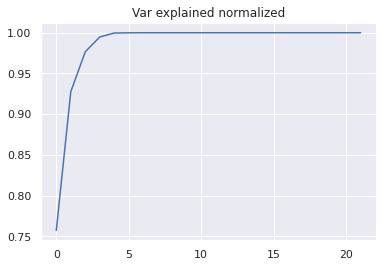

In [6]:
#print(pca.explained_variance_)
#print(pca.components_)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')

En la imagen anterior pordemos observar el comportamiento con todos los elementos $(22 - componentes)$, a partir del 3-4 se estabiliza la varianza.
Acostando los componentes tenemos el siguiente comportamiento, donde en el componente 4 se alcanza estabilidad.

Text(0.5, 1.0, 'Var explained normalized')

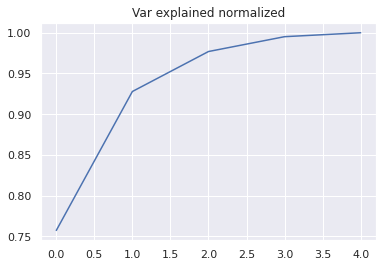

In [7]:
# Variamos componentes
pca = PCA(n_components=5) #creamos PCA
pca.fit(data) # Entrenamos el modelo PCA 
datatrans = pca.transform(data)
#print("Original shape:",data.shape)
#print("transformed shape:",datatrans.shape)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')

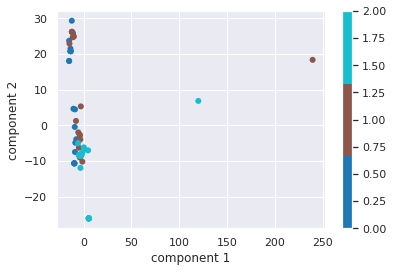

In [8]:
# Comparar componente 
plt.scatter(datatrans[:, 0], datatrans[:, 1],
            c= Tipo, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Variamos componentes y comparamos

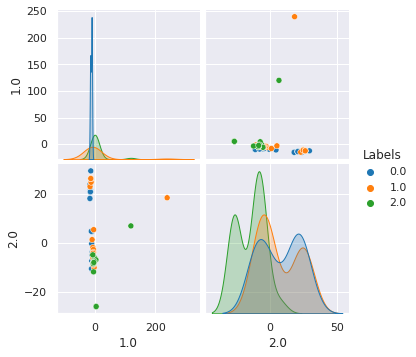

In [9]:
n = 2
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

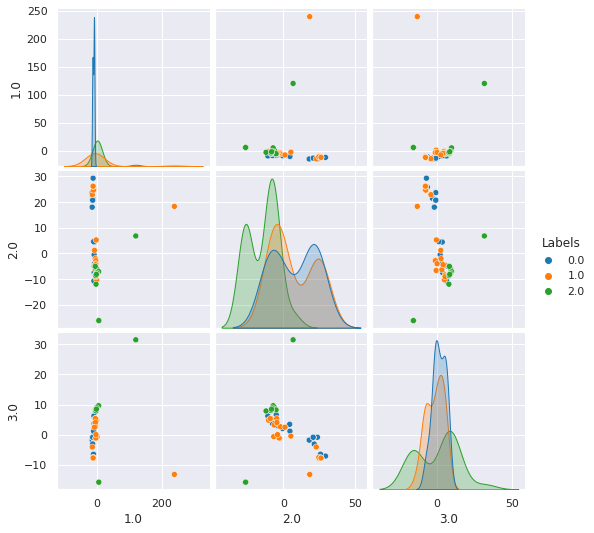

In [10]:
n = 3
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

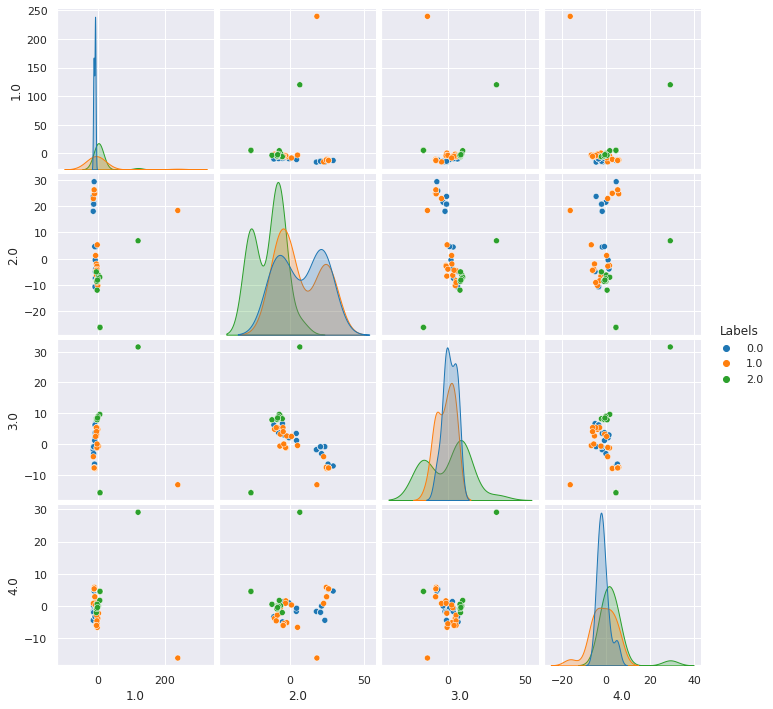

In [11]:
n = 4
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

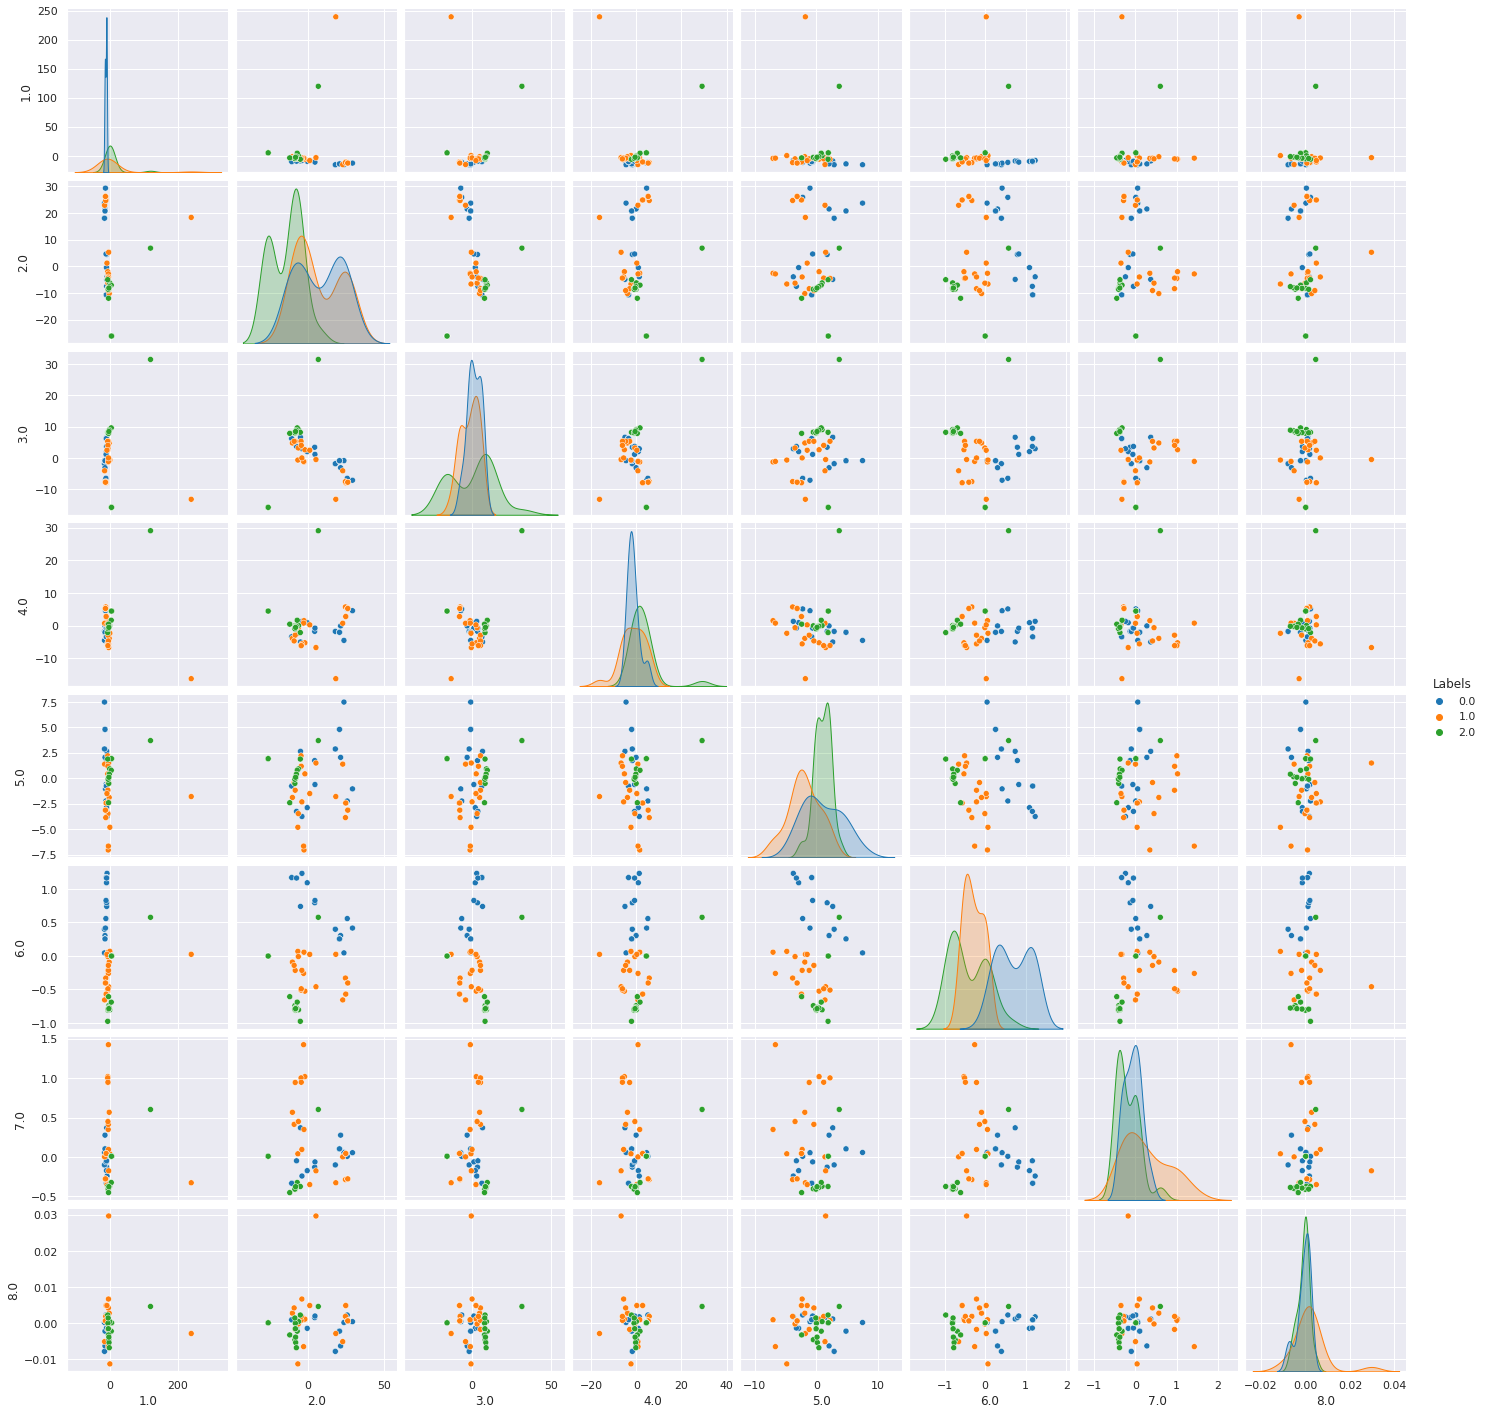

In [12]:
n = 8
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

In [13]:
#n = 14
#pca = PCA(n_components= n)
#projectedZ = pca.fit_transform(data)
#BasisW = pca.components_
#dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
#dataFrame['Labels'] = Tipo
#sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Podemos observar que cuando aumentamos los componentes, en las graficas, la informacion se encuentra mas dispersa lo cual no nos aporta lo suficiente asi que es suficiente con tener las primeras 4 componentes donde se observan cambios importantes hasta alcanzar la estabilidad en la varianza.

# Modelos lineales de clasificación 
## Regresión Logística

## Sin PCA

Acuracy Train:  0.9148936170212766
Acuracy Test:  0.75


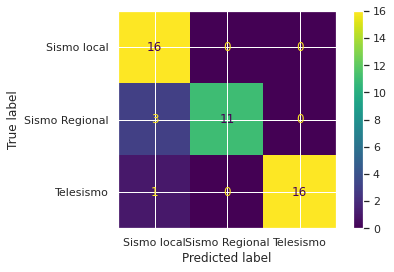

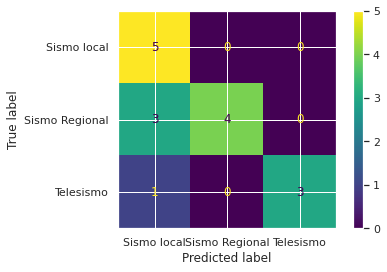

In [22]:
# importemos algunos datos
data2 = np.asarray(data.drop('Etiquetas',1))
X = data2[:, 6:10]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tipo

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)


# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test

Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))


print('Acuracy Train: ', Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Sismo local','Sismo Regional','Telesismo'])
ax1.plot()
plt.show()


ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Sismo local','Sismo Regional','Telesismo'])
ax2.plot()
plt.show()

## Con PCA

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.875


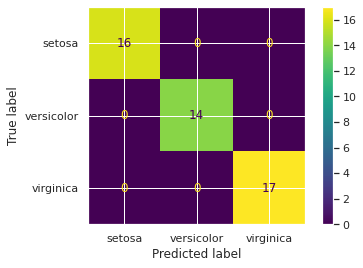

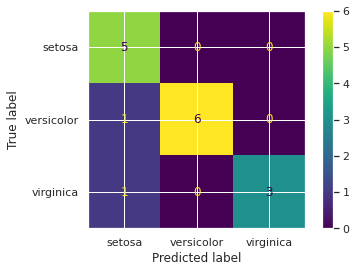

In [29]:
#data2 = np.asarray(data.drop('Etiquetas',1))
modelPCA = PCA(n_components=8)
X = data2 

X_PCA = modelPCA.fit_transform(X)
Y = Tipo

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, random_state = 123)


# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['setosa','versicolor','virginica'])
ax1.plot()
plt.show()


ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['setosa','versicolor','virginica'])
ax2.plot()
plt.show()

## Bayesiano
# Sin PCA

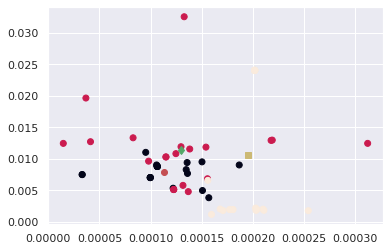

In [43]:
t = np.asarray(Tipo)
X = data2[:, 6:11] 

pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)

plt.scatter(X[:,0],X[:,1],c = t)
plt.plot(mu_C1[0],mu_C1[1],'or')
plt.plot(mu_C2[0],mu_C2[1],'dg')
plt.plot(mu_C3[0],mu_C3[1],'sy')

plt.show()

[[0.263169   0.49395353 0.24287748]
 [0.42220737 0.18813937 0.38965327]
 [0.51545636 0.00883131 0.47571234]
 [0.51545636 0.00883131 0.47571234]
 [0.2873071  0.44753848 0.26515442]
 [0.36541644 0.29734238 0.33724118]
 [0.42922793 0.17463956 0.39613251]
 [0.4387348  0.15635884 0.40490636]
 [0.25711673 0.50559141 0.23729186]
 [0.47972791 0.07753338 0.44273871]]
Accuracy:  0.5555555555555556


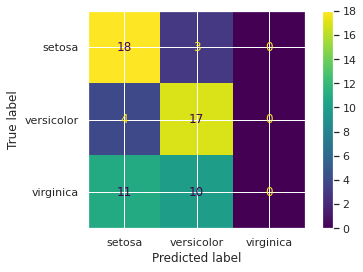

In [44]:
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)


N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.inv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C1 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

print(p_Ck_dado_X[:10])
# print(np.sum(p_Ck_dado_X,axis = 1))
t_Est = np.argmax(p_Ck_dado_X, axis = 1)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['setosa','versicolor','virginica'])
ax.plot()
plt.show()

# 2

# Sección nueva

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [16]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
# Compute the components and projected faces
pca = PCA(n_components = 800,svd_solver='randomized').fit(faces.data) #variar parametroooo
Xfaces = faces.data
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

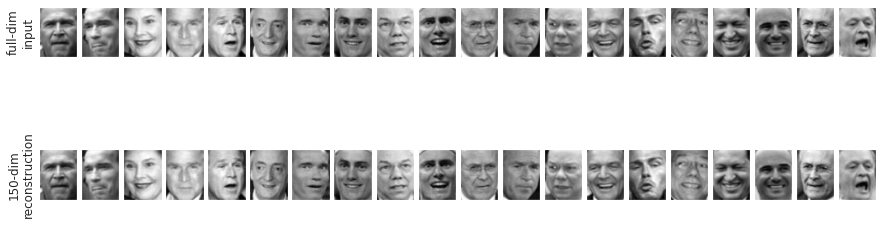

In [17]:
# Plot the results
fig, ax = plt.subplots(2, 20, figsize=(15,5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(20):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');